<a href="https://colab.research.google.com/github/gasoares23/IC/blob/main/ProblemaG1_GA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-opt

best_x: [6.19888306e-06 1.42790377e-04 8.35471787e-04 1.50535070e-03
 9.92309845e-01 9.61589533e-01 9.98538451e-01 9.99922860e-01
 9.90175588e-01 9.99999473e+01 9.99995845e+01 9.99998715e+01
 9.99021240e-01] 
 best_y: [-305.92852668]


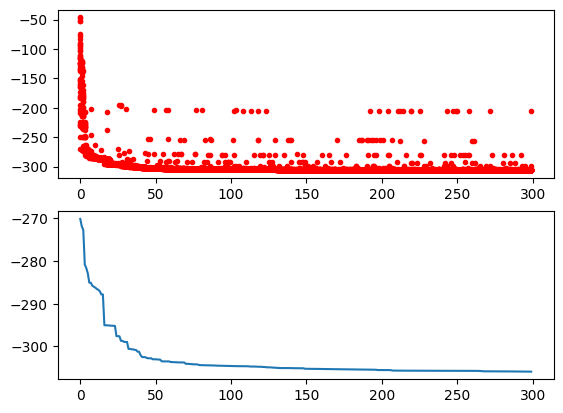

In [10]:
import numpy as np
from sko.GA import GA
import pandas as pd
import matplotlib.pyplot as plt

def custom_function(x):
    # Definindo a função customizada
    sum1 = np.sum(x[:4]) * 5
    sum2 = np.sum(np.square(x[:4])) * (-5)
    sum3 = np.sum(x[4:]) * (-1)
    return sum1 + sum2 + sum3

# Definindo as restrições
def constraint_function(x):
    g = np.zeros(9)
    g[0] = 2 * x[0] + 2 * x[1] + x[9] + x[10] - 10
    g[1] = 2 * x[0] + 2 * x[2] + x[9] + x[11] - 10
    g[2] = 2 * x[1] + 2 * x[2] + x[10] + x[11] - 10
    g[3] = -8 * x[0] + x[9]
    g[4] = -8 * x[1] + x[10]
    g[5] = -8 * x[2] + x[11]
    g[6] = -8 * x[3] + x[12]
    g[7] = -2 * x[3] - x[4] + x[9]
    g[8] = -2 * x[5] - x[6] + x[10]
    g[9] = -2 * x[7] - x[8] + x[11]
    return g

# Configurando o algoritmo genético com restrições
ga_custom = GA(func=custom_function, n_dim=13, size_pop=50, max_iter=300, prob_mut=0.001, lb=[0] * 13, ub=[100] * 13, precision=1e-7)

# Definindo as restrições no algoritmo genético
ga_custom.lb[:9] = [0]*9
ga_custom.ub[:9] = [1]*9
ga_custom.lb[9:12] = [0]*3
ga_custom.ub[9] = 100
ga_custom.ub[10] = 100
ga_custom.ub[11] = 100
ga_custom.lb[12] = 0
ga_custom.ub[12] = 1

ga_custom.constraint_eq = [0]*9
ga_custom.constraint_ueq = constraint_function

# Executando o algoritmo genético com restrições
best_x_custom, best_y_custom = ga_custom.run()

print('best_x:', best_x_custom, '\n', 'best_y:', best_y_custom)

# Plotando o resultado
Y_history_custom = pd.DataFrame(ga_custom.all_history_Y)
fig, ax = plt.subplots(2, 1)
ax[0].plot(Y_history_custom.index, Y_history_custom.values, '.', color='red')
Y_history_custom.min(axis=1).cummin().plot(kind='line')
plt.show()
